Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values

**Missing Values in a Dataset:**

Missing values in a dataset refer to the absence of values for certain observations or variables. These missing values are denoted by placeholders like NaN (Not a Number), null, or other representations depending on the data format. Missing values can occur for various reasons, including data entry errors, equipment failures, or the nature of the data collection process.

**Importance of Handling Missing Values:**

Handling missing values is essential for several reasons:

1. **Biased Analysis:** If not addressed, missing values can lead to biased or inaccurate analysis and modeling.

2. **Reduced Model Performance:** Many machine learning algorithms cannot handle missing values directly, and attempting to use them without addressing missing values may result in errors or degraded model performance.

3. **Incomplete Insights:** Missing values may lead to incomplete insights, affecting the quality and reliability of the conclusions drawn from the data.

4. **Data Quality:** Addressing missing values is crucial for maintaining overall data quality and ensuring the integrity of analytical results.

**Algorithms Not Affected by Missing Values:**

While many machine learning algorithms require complete datasets, some algorithms are inherently robust to missing values. These algorithms can handle missing values without requiring imputation or removal. Examples include:

1. **Decision Trees:**
   - **Property:** Robust to missing values.
   - **Handling:** Decision trees can make decisions based on the available features at each node, and missing values are effectively treated as just another category.

2. **Random Forests:**
   - **Property:** Robust to missing values.
   - **Handling:** Random forests are ensembles of decision trees, inheriting the robustness of decision trees regarding missing values.

3. **K-Nearest Neighbors (KNN):**
   - **Property:** Can handle missing values.
   - **Handling:** KNN imputes missing values by taking the average of the nearest neighbors' values.

4. **Naive Bayes:**
   - **Property:** Generally robust to missing values.
   - **Handling:** The Naive Bayes algorithm computes probabilities based on available feature values, and missing values are handled naturally.

5. **Support Vector Machines (SVM):**
   - **Property:** Can handle missing values.
   - **Handling:** SVMs are relatively robust to missing values, as they focus on the support vectors in the feature space.

6. **XGBoost (Extreme Gradient Boosting):**
   - **Property:** Can handle missing values.
   - **Handling:** XGBoost has mechanisms for handling missing values during training and prediction.

Q2: List down techniques used to handle missing data. Give an example of each with python code.

Techniques that are used to handle missing data:
1. Mean Imputation: filling the missing values with the mean of the feature. It works well when we have normally distributed data.

2. Median Imputation: filling the missing values with the median of the feature. This method is used when we have outliers in the data.

3. Mode Imputation: filling the missing values with the mode of the feature. This method is specially used for categorical values.

4. Data Interpolation: estimating the unknown values within a dataset based on the known values.

  i) Linear Interpolation.
  ii) Cubic Interpolation.
  iii) Polynomial Interpolation.

In [1]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# we have 177 missing values in age column, 688 missing values in deck column and 2 missing values in both embarked and embark_town column.

titanic['age'].fillna(titanic['age'].mean(), inplace = False) # filling the age column with mean of that column.
titanic['age'].fillna(titanic['age'].mode()[0], inplace = False) # filling the age column with mode of that column.
titanic['age'].fillna(titanic['age'].median(), inplace = False) # filling the age column with median of that column.

titanic['deck'].fillna(titanic['deck'].mode()[0], inplace = False) # filling the deck column with mode of that column.

titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = False) # filling the embarked column with mode of that column.

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace = False) # filling the embark_town column with mode of that column.



0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

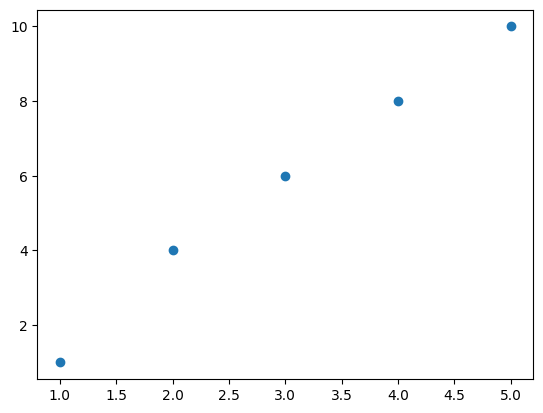

In [5]:
# linear interpolation
x = np.array([1,2,3,4,5])
y = np.array([1,4,6,8,10])

plt.scatter(x, y)

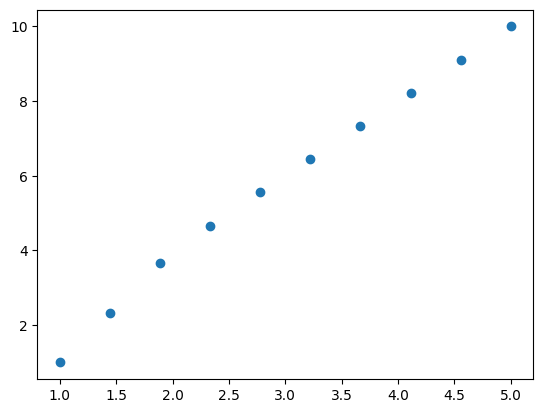

In [6]:
x_new = np.linspace(1, 5, 10)
y_interp = np.interp(x_new, x, y)
plt.scatter(x_new, y_interp)

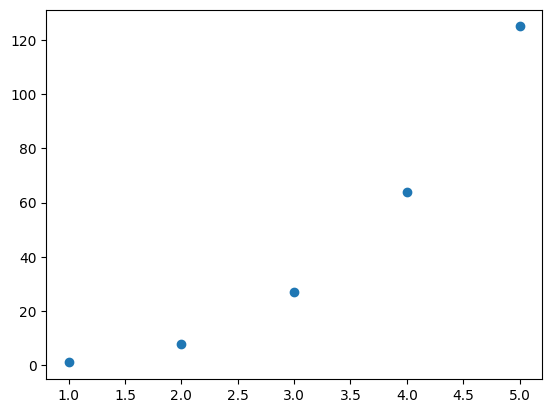

In [7]:
# cubic interpolation
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 8, 27, 64, 125])
plt.scatter(x, y)

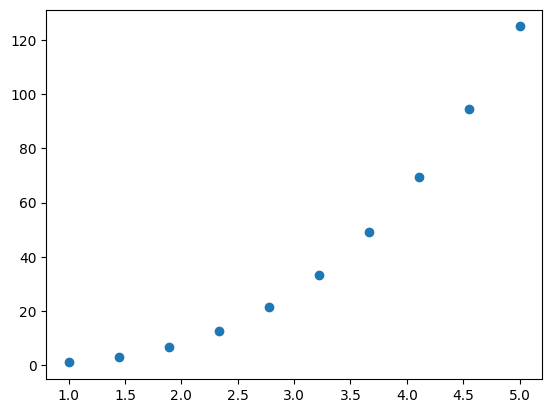

In [8]:
x_new = np.linspace(1, 5, 10)

from scipy.interpolate import interp1d
f = interp1d(x, y, kind = 'cubic')
y_interp = f(x_new)
plt.scatter(x_new, y_interp)

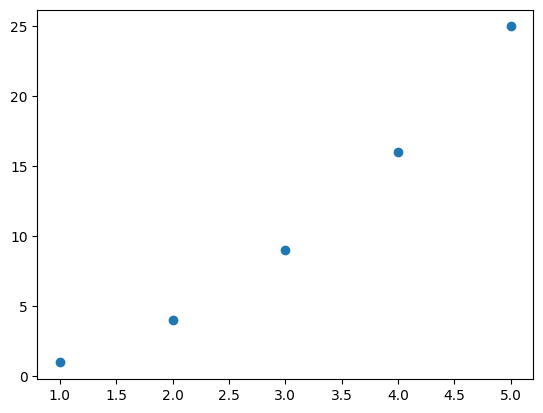

In [9]:
# polynomial Interpolation
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])
plt.scatter(x, y)

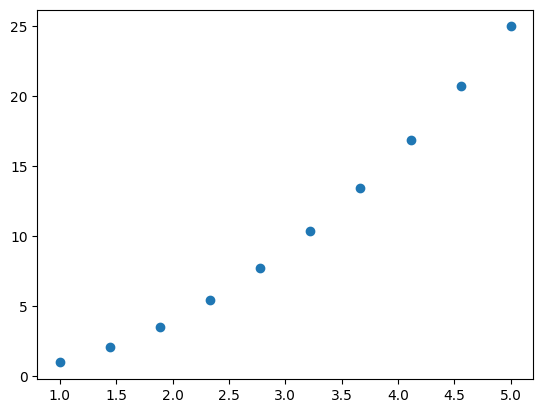

In [10]:
x_new = np.linspace(1, 5, 10)
p = np.polyfit(x, y, 2)
y_interp = np.polyval(p, x_new)
plt.scatter(x_new, y_interp)

Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?


**Imbalanced Data:**

In the context of machine learning, imbalanced data refers to a situation where the distribution of classes in the target variable is not equal. One class (the majority class) significantly outnumbers the instances of another class or classes (the minority class or classes). Imbalanced datasets are common in various domains, including fraud detection, medical diagnosis, and rare-event prediction.

**Consequences of Not Handling Imbalanced Data:**

If imbalanced data is not handled, it can lead to several challenges and issues, impacting the performance of machine learning models:

1. **Biased Model Training:**
   - **Issue:** The model may be biased toward the majority class because it has more instances to learn from.
   - **Consequence:** The model might perform well on the majority class but poorly on the minority class.

2. **Poor Generalization:**
   - **Issue:** The model may struggle to generalize to new, unseen data, especially for the minority class.
   - **Consequence:** The model may misclassify or completely ignore instances of the minority class in new data.

3. **Misleading Evaluation Metrics:**
   - **Issue:** Traditional accuracy can be misleading in imbalanced datasets.
   - **Consequence:** The model may appear accurate if it predicts the majority class correctly but may perform poorly on the minority class.

4. **Model Sensitivity to the Majority Class:**
   - **Issue:** Models may prioritize predicting the majority class due to its prevalence.
   - **Consequence:** The model may not pay sufficient attention to the minority class, leading to false negatives and missed opportunities.

5. **Difficulty in Detecting Rare Events:**
   - **Issue:** Rare events (e.g., fraud, diseases) may be challenging to detect when the data is imbalanced.
   - **Consequence:** The model may fail to identify critical instances of the minority class.

6. **Model Skewing Toward Majority Class:**
   - **Issue:** The model might learn to always predict the majority class, achieving high accuracy but providing little value.
   - **Consequence:** The model may not capture the patterns and nuances associated with the minority class.

**Handling Imbalanced Data:**

Several techniques can be employed to address imbalanced data:

1. **Resampling:**
   - **Over-sampling:** Increase the number of instances in the minority class.
   - **Under-sampling:** Decrease the number of instances in the majority class.

2. **Synthetic Data Generation:**
   - **SMOTE (Synthetic Minority Over-sampling Technique):** Generate synthetic instances for the minority class to balance the dataset.

3. **Cost-sensitive Learning:**
   - **Assign different misclassification costs:** Increase the cost of misclassifying the minority class.

4. **Ensemble Methods:**
   - **Use ensemble methods (e.g., Random Forests):** These methods can handle imbalanced data better than some individual algorithms.

5. **Different Evaluation Metrics:**
   - **Use precision, recall, F1-score, or AUC-ROC:** These metrics provide a more comprehensive assessment of model performance in imbalanced datasets compared to accuracy.

6. **Algorithm-Specific Approaches:**
   - **Class weights:** Adjust class weights in algorithms like logistic regression or support vector machines to give more importance to the minority class.

Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-sampling are required.


Up-sampling and Down-sampling are techniques that are used to handle imbalance datasets.

Up-sampling is used to increase the minority data points.

Down-sampling is used to decrease the majority data points.

In [11]:
from sklearn.utils import resample
from sklearn.datasets import make_classification
import pandas as pd

In [12]:
x, y = make_classification(n_samples = 1000, n_redundant = 0, n_features = 2, n_clusters_per_class = 1, weights = [0.90], random_state = 14)

In [13]:
df = pd.concat([pd.DataFrame(x, columns = ['f1', 'f2']), pd.DataFrame(y, columns = ['target'])], axis = 1)
df.head()

,f1,f2,target
0,-1.562821,0.885500,0
1,-0.675617,1.276639,0
2,2.812998,0.215672,1
3,-0.999362,1.061059,0
4,-1.654020,0.797742,0


In [14]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [15]:
df_resampled = resample(df[df['target'] == 1], replace = True, n_samples = 800, random_state = 14)

In [16]:
df_resampled['target'].value_counts()

1    800
Name: target, dtype: int64

In [17]:
df2 = pd.concat([df, df_resampled], axis = 0)
df2['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

Q5: What is data Augmentation? Explain SMOTE.

**Data Augmentation:**

Data augmentation is a technique used in machine learning to artificially increase the size of a training dataset by applying various transformations to the existing data. The goal is to create additional variations of the original data, providing the model with a more diverse set of examples. Data augmentation is commonly used in computer vision tasks, such as image classification, where the augmented data can include variations in rotation, scaling, cropping, and flipping.

By introducing augmented data, the model becomes more robust and better generalizes to variations it might encounter during testing. Data augmentation helps prevent overfitting and improves the model's ability to capture underlying patterns in the data.

**SMOTE (Synthetic Minority Over-sampling Technique):**

SMOTE is a specific data augmentation technique designed to address the issue of imbalanced datasets, particularly in the context of classification tasks with minority and majority classes. The primary goal of SMOTE is to increase the representation of the minority class by generating synthetic instances.

**How SMOTE Works:**

1. **Identify Minority Class Instances:**
   - SMOTE operates on the instances of the minority class in the dataset.

2. **Select a Minority Instance:**
   - Randomly choose an instance from the minority class.

3. **Find Neighbors:**
   - Identify k-nearest neighbors for the selected instance. The value of k is a user-defined parameter.

4. **Generate Synthetic Instances:**
   - For each neighbor, create a synthetic instance along the line connecting the selected instance and the neighbor. The number of synthetic instances created is also a user-defined parameter.

5. **Repeat for Other Instances:**
   - Repeat the process for other instances in the minority class.

**Example:**

Consider a dataset with two classes, A and B, where class A is the minority class. SMOTE would select instances from class A, identify their nearest neighbors, and generate synthetic instances along the lines connecting the selected instances and their neighbors. The resulting dataset would have an increased representation of the minority class.

**Advantages of SMOTE:**

1. **Addresses Imbalance:** SMOTE helps address the class imbalance problem by generating synthetic instances for the minority class, balancing the distribution.

2. **Prevents Overfitting:** By introducing synthetic instances, SMOTE helps the model generalize better to minority class examples, reducing the risk of overfitting.

3. **Improved Classification:** With a more balanced dataset, the model can learn better decision boundaries, leading to improved classification performance.

**Considerations:**

- While SMOTE is effective in certain scenarios, it may not be suitable for all types of data or tasks.
- Care should be taken when applying SMOTE, especially in cases where the creation of synthetic instances may introduce noise or outliers.
- The choice of parameters, such as the number of neighbors and the number of synthetic instances to generate, can impact the effectiveness of SMOTE.

Q6: What are outliers in a dataset? Why is it essential to handle outliers?


**Outliers in a Dataset:**

Outliers are data points that significantly differ from the majority of the other data points in a dataset. These data points are usually distant from the central tendency of the data, such as the mean or median. Outliers can occur due to various reasons, including measurement errors, data entry mistakes, natural variation, or rare events. Identifying and handling outliers is crucial for accurate statistical analysis and model development.

**Importance of Handling Outliers:**

1. **Impact on Descriptive Statistics:**
   - **Issue:** Outliers can heavily influence summary statistics such as the mean and standard deviation.
   - **Consequence:** Descriptive statistics may not accurately represent the central tendency and variability of the majority of the data.

2. **Distortion of Data Distributions:**
   - **Issue:** Outliers can skew the distribution of the data.
   - **Consequence:** Data distributions may appear non-normal, affecting the validity of statistical tests and assumptions.

3. **Model Performance:**
   - **Issue:** Outliers can disproportionately impact model training, especially in algorithms sensitive to extreme values.
   - **Consequence:** Models may be influenced or biased by outliers, leading to poor generalization to new data.

4. **Validity of Statistical Tests:**
   - **Issue:** Outliers can violate the assumptions of certain statistical tests.
   - **Consequence:** Statistical tests may produce inaccurate results if the assumptions, such as normality, are not met.

5. **Robustness of Models:**
   - **Issue:** Outliers can lead to the violation of assumptions of linear models.
   - **Consequence:** Linear models may provide inaccurate parameter estimates, affecting the reliability of predictions.

6. **Data Visualization:**
   - **Issue:** Outliers can distort visualizations, making it challenging to interpret patterns and trends.
   - **Consequence:** Misleading visualizations may hinder the understanding of the underlying data.


Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?


If the missing data is a numerical data then I will perform median or mean imputation, if the missing data is a categorical data then i will perform mode imputation.

Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?


When dealing with missing data in a large dataset, understanding whether the missing data is missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR) can provide insights into potential biases and guide appropriate strategies for handling missing values. Here are some strategies to explore and determine the nature of missing data:

1. **Descriptive Statistics:**
   - Examine summary statistics for variables with missing values and compare them with those without missing values.
   - If the summary statistics are similar between the two groups, it suggests missing data might be MCAR or MAR.

2. **Correlation Analysis:**
   - Conduct correlation analysis to identify relationships between missing and non-missing variables.
   - If there is no significant correlation, it suggests the missing data might be MCAR.

3. **Visualization:**
   - Use visualizations such as heatmaps or histograms to visually inspect patterns of missing values.
   - Look for patterns or clusters of missing values that could indicate a non-random process.

4. **Missing Data Patterns:**
   - Explore patterns of missing values across different variables and observations.
   - Identify if there is a systematic pattern or if the missingness seems random.

5. **Missingness Tests:**
   - Conduct statistical tests for missingness, such as Little's MCAR test.
   - These tests assess whether missing values are related to observed values. A non-significant result suggests MCAR.

6. **Imputation and Comparison:**
   - Impute missing values using different imputation methods.
   - Compare the results of analyses with imputed values to those without imputed values. If imputation methods yield similar results, it suggests the missing data might be MCAR or MAR.

7. **Domain Knowledge:**
   - Leverage domain knowledge to understand whether the missingness makes sense in the context of the data collection process.
   - If missing values align with expectations based on the domain, it may provide insights into whether missingness is MNAR.

8. **Missing Data Models:**
   - Consider using missing data models, where the missingness mechanism is explicitly modeled.
   - Techniques like multiple imputation with an appropriate missing data model can help account for the uncertainty introduced by missing data.

9. **Time-Based Analysis:**
   - If the data is collected over time, analyze whether there are temporal patterns in missing data.
   - Changes in missingness patterns over time may suggest MAR or MNAR.

10. **Sensitivity Analysis:**
    - Perform sensitivity analyses by assuming different missing data mechanisms and assessing the impact on study results.
    - Evaluate how robust the findings are to different assumptions about missingness.

Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?


I will use Synthetic Minority Over-sampling Technique(SMOTE) to over sample the minority class and to balance the dataset.

Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?


 I will use down-sampling technique to down-sample the majority class data. I will implementing this using `sklearn.utils.resample` library.

Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

I will use over-sampling technique or SMOTE to over-sample the minority class data.
I will implement this using `sklearn.utils.resample` and `imbalance.oversampling.SMOTE` libraries.